In [1]:
!pip install -U textblob
!pip install tensorflow-hub
!pip install fasttext

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load Data

In [3]:
df_train = pd.read_csv("Webpages_Classification_train_data.csv")
df_test = pd.read_csv("Webpages_Classification_test_data.csv")

#Ensuring correct sequence of columns 
df_train = df_train[['url','ip_add','geo_loc','url_len','js_len','js_obf_len','tld','who_is','https','content','label']]
df_test = df_test[['url','ip_add','geo_loc','url_len','js_len','js_obf_len','tld','who_is','https','content','label']]

### Split Data 

In [4]:
df_test
#df_train

# Separate "good" and "bad" samples in df_train
good_samples = df_train[df_train['label'] == 'good']
bad_samples = df_train[df_train['label'] == 'bad']

# Calculate the number of samples needed for each class
num_samples = min(len(good_samples), len(bad_samples))

# Sample the same number of "good" and "bad" samples
good_samples_reduced = good_samples.sample(n=num_samples, random_state=42)
bad_samples_reduced = bad_samples.sample(n=num_samples, random_state=42)

# Concatenate the reduced samples
df_train_reduced = pd.concat([good_samples_reduced, bad_samples_reduced])

# Shuffle the DataFrame to mix the samples
df_train_reduced = df_train_reduced.sample(frac=1, random_state=42)

# Now df_train_reduced contains the same number of "good" and "bad" samples
# Do the same for df_test
df_test_reduced = pd.concat([good_samples.sample(n=num_samples, random_state=42),
                             bad_samples.sample(n=num_samples, random_state=42)])
df_test_reduced = df_test_reduced.sample(frac=1, random_state=42)

# Ensure consistency of columns
df_test_reduced = df_test_reduced[df_train_reduced.columns]

# Shuffle the DataFrame to mix the samples
df_test_reduced = df_test_reduced.sample(frac=1, random_state=42)

#df_train_reduced = df_train
#df_test_reduced = df_test

label
bad     27253
good    27253
Name: count, dtype: int64


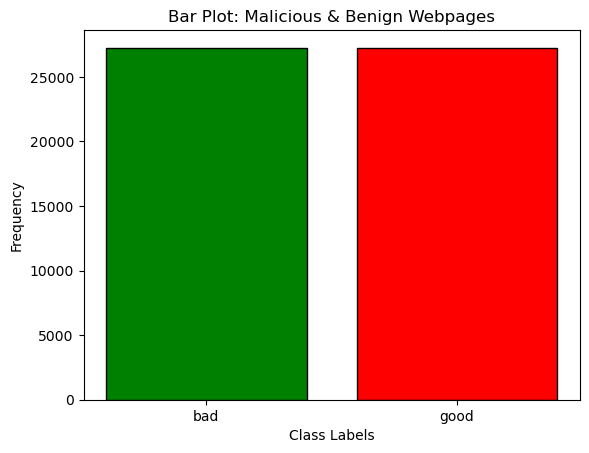

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("Class Labels")
ax1.set_ylabel("Frequency") 
ax1.title.set_text('Bar Plot: Malicious & Benign Webpages')
labels = df_train_reduced['label'].value_counts()

print(labels)
w = (list(labels.index), list(labels.values))
ax1.tick_params(axis='both', which='major')
bar = ax1.bar(w[0], w[1], color=['green','red'], edgecolor='black', linewidth=1)



## Attribute 'Content' 
  Add Sentiment Polarity Analysis of Web Content:

In [6]:
from textblob import TextBlob
import plotly.graph_objects as go

df_train_reduced['polarity'] = df_train_reduced['content'].map(lambda content: TextBlob(content).sentiment.polarity)
df_test_reduced['polarity'] = df_test_reduced['content'].map(lambda content: TextBlob(content).sentiment.polarity)

# GRAPH
df_trial_good = df_train_reduced.loc[df_train['label']=='good']
df_trial_bad = df_train_reduced.loc[df_train['label']=='bad']
fig = go.Figure()
t1= go.Histogram(x=df_trial_good['polarity'],name='Benign Webpages',marker_color='green')
t2= go.Histogram(x=df_trial_bad['polarity'],name='Malicious Webpages',marker_color='red')
fig.add_trace(t1)
fig.add_trace(t2)
fig.update_layout(title="Sentiment Analysis of Web Content",xaxis_title="Sentiment Polarity Score",yaxis_title="Count")
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
# GRAPH

df_train_reduced


,url,ip_add,geo_loc,url_len,js_len,js_obf_len,tld,who_is,https,content,label,polarity
1007099,http://groups.yahoo.com/group/bdsm-vlaanderen/,222.234.33.157,South Korea,46,828.9,737.721,com,incomplete,no,kill shoot negro pindick trots shit mothafucke...,bad,0.000704
917158,http://www.najical.com/blink182/,180.245.175.246,Indonesia,32,72.5,0.000,com,complete,yes,Into bermuda criticised in france between the ...,good,0.060909
421539,http://padihamparish.org/,63.217.235.1,United States,25,81.5,0.000,org,incomplete,yes,"Turkey, arabia, in forms of and the mixed biol...",good,-0.045370
551597,http://www.insenses.org/virtualboxon/,214.217.119.112,United States,37,0.0,0.000,org,complete,no,cocktease fatfuck taff swallow gyppy lolita fu...,bad,-0.089583
834317,http://www.locusarts.org,169.225.229.223,United States,24,95.0,0.000,org,complete,yes,Election saw for up to 56. Completed on cathol...,good,0.003704
...,...,...,...,...,...,...,...,...,...,...,...,...
514605,http://www.maximumhardcoremovies.com/hardcore_...,96.208.197.23,United States,67,777.6,520.992,com,incomplete,no,poo dirty shithouse fagging nutfucker panti so...,bad,-0.024538
1059976,http://www.dawnsplace.com/,103.98.55.171,Singapore,26,672.3,470.610,com,incomplete,no,nigger cacker virginbreaker upthebutt pommy di...,bad,-0.022802
820506,http://adultlinkpost.com/,49.51.76.213,United States,25,638.1,325.431,com,incomplete,no,kaffre crack buttmunch jiggy butt-fuck rape bi...,bad,-0.034337
762225,http://global-forum.org,106.28.187.211,China,23,92.5,0.000,org,complete,yes,"Developed through include classical mechanics,...",good,0.029232


Length of Web Content Analysis

In [7]:
df_train_reduced['content_len'] = df_train_reduced['content'].astype(str).apply(len)
df_test_reduced['content_len'] = df_test_reduced['content'].astype(str).apply(len)

#df_trial : good and bad
df_trial_good = df_train_reduced.loc[df_train['label']=='good']
df_trial_bad = df_train_reduced.loc[df_train['label']=='bad']
#Plotting it on Histograms
fig = go.Figure()
t1= go.Histogram(x=df_trial_good['content_len'],name='Benign Webpages',marker_color='green')
t2= go.Histogram(x=df_trial_bad['content_len'],name='Malicious Webpages',marker_color='red')
fig.add_trace(t1)
fig.add_trace(t2)
fig.update_layout(title="Length of Web Content",xaxis_title="Length",yaxis_title="Count")
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

### Clean Text function

In [8]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove non-alphanumeric characters, extra whitespaces, and newline characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.replace('\n', ''))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/diogofilipe84/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/diogofilipe84/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/diogofilipe84/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Create the training file


In [9]:
df_train_reduced
df_train
        
with open('content_data.txt', 'w', encoding='utf-8') as f:
    for index, row in df_train_reduced.iterrows():
        label = 0 if row['label'] == 'good' else 1
        preprocessed_content = preprocess_text(row['content'])
        f.write(f"__label__{label} {preprocessed_content}\n")
   

### Train model FastText

In [10]:
import fasttext

model = fasttext.train_supervised('content_data.txt', lr=0.1, dim=100, ws=5, epoch=5)


Read 24M words
Number of words:  53043
Number of labels: 2
Progress: 100.0% words/sec/thread: 3285354 lr:  0.000000 avg.loss:  0.146538 ETA:   0h 0m 0s


In [11]:
df_train_reduced['content_vector'] = df_train_reduced['content'].apply(lambda x: model.get_sentence_vector(preprocess_text(x)))
df_test_reduced['content_vector'] = df_test_reduced['content'].apply(lambda x: model.get_sentence_vector(preprocess_text(x)))

df_train_reduced

# df_train['content_vector'] = df_train['content'].apply(lambda x: model.get_sentence_vector(preprocess_text(x)))

# df_train



,url,ip_add,geo_loc,url_len,js_len,js_obf_len,tld,who_is,https,content,label,polarity,content_len,content_vector
1007099,http://groups.yahoo.com/group/bdsm-vlaanderen/,222.234.33.157,South Korea,46,828.9,737.721,com,incomplete,no,kill shoot negro pindick trots shit mothafucke...,bad,0.000704,9633,"[-0.0036888258, -0.0007274164, 0.012161999, 0...."
917158,http://www.najical.com/blink182/,180.245.175.246,Indonesia,32,72.5,0.000,com,complete,yes,Into bermuda criticised in france between the ...,good,0.060909,1217,"[0.0066274204, 0.0025275229, -0.022332108, -0...."
421539,http://padihamparish.org/,63.217.235.1,United States,25,81.5,0.000,org,incomplete,yes,"Turkey, arabia, in forms of and the mixed biol...",good,-0.045370,1215,"[0.0062394626, 0.001005818, -0.020447744, -0.0..."
551597,http://www.insenses.org/virtualboxon/,214.217.119.112,United States,37,0.0,0.000,org,complete,no,cocktease fatfuck taff swallow gyppy lolita fu...,bad,-0.089583,1619,"[-0.0005138002, 0.00032836114, 0.0013242499, 0..."
834317,http://www.locusarts.org,169.225.229.223,United States,24,95.0,0.000,org,complete,yes,Election saw for up to 56. Completed on cathol...,good,0.003704,866,"[0.0026227783, 0.0017882063, -0.011394033, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514605,http://www.maximumhardcoremovies.com/hardcore_...,96.208.197.23,United States,67,777.6,520.992,com,incomplete,no,poo dirty shithouse fagging nutfucker panti so...,bad,-0.024538,7936,"[-0.0039932257, -0.0007680948, 0.01260411, 0.0..."
1059976,http://www.dawnsplace.com/,103.98.55.171,Singapore,26,672.3,470.610,com,incomplete,no,nigger cacker virginbreaker upthebutt pommy di...,bad,-0.022802,8378,"[-0.0035505288, -0.00033802577, 0.012088345, 0..."
820506,http://adultlinkpost.com/,49.51.76.213,United States,25,638.1,325.431,com,incomplete,no,kaffre crack buttmunch jiggy butt-fuck rape bi...,bad,-0.034337,7933,"[-0.0030041868, -0.0003315877, 0.0105145825, 0..."
762225,http://global-forum.org,106.28.187.211,China,23,92.5,0.000,org,complete,yes,"Developed through include classical mechanics,...",good,0.029232,1687,"[0.0071719256, 0.0024777337, -0.022762975, -0...."


### PCA graph

In [12]:
from sklearn.decomposition import PCA

# X = df_train_reduced['content_vector'].tolist()
X = df_train_reduced['content_vector'].tolist()


pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# # Convert the PCA-reduced data back into a DataFrame for easier manipulation
# pca_df = pd.DataFrame(X_pca, columns=['pca-one', 'pca-two', 'pca-three'])

# # Assuming you have a 'label' column in your original DataFrame to distinguish between 'good' and 'bad'
# pca_df['label'] = df_train_reduced['label']

X_pca

array([[-1.57930158e-01, -1.89757116e-03, -1.97437039e-05],
       [ 1.65281259e-01,  1.18019414e-03,  7.41215839e-04],
       [ 1.55592620e-01,  8.15082168e-04,  2.12306030e-04],
       ...,
       [-1.46583591e-01, -4.20348726e-03,  8.38956777e-04],
       [ 1.72828843e-01, -1.77274337e-03, -1.00571734e-04],
       [ 1.61728184e-01, -3.06241630e-03,  3.44749876e-04]])

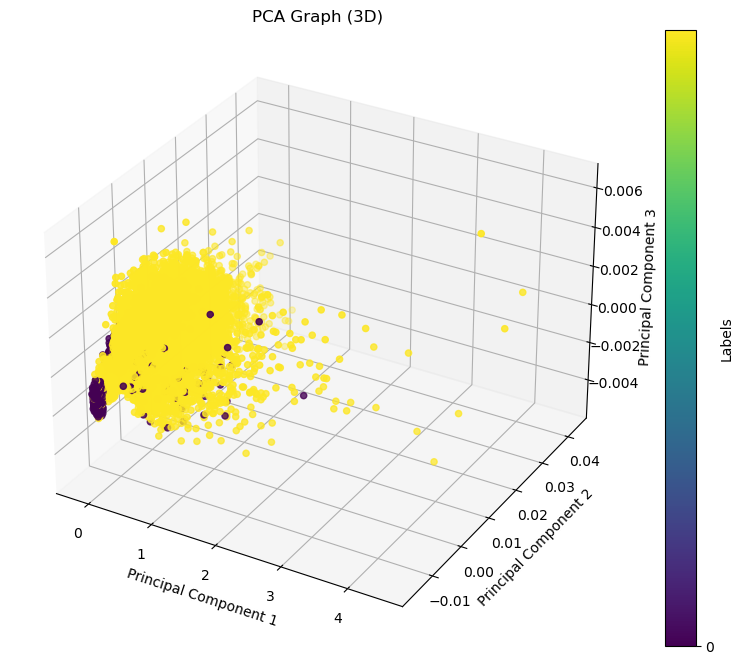

In [13]:
# # Plot PCA graph
# plt.figure(figsize=(8, 6))
# # plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(df_train_reduced['label'])[0], cmap='viridis')
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(df_train['label'])[0], cmap='viridis')

# plt.title('PCA Graph')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Labels')
# plt.grid(True)
# plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define unique colors for each label
unique_labels = pd.factorize(df_train_reduced['label'])[0]
colors = plt.cm.viridis(unique_labels.astype(float) / len(unique_labels))

# Scatter plot
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=unique_labels, cmap='viridis')

# Labeling axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Title
plt.title('PCA Graph (3D)')

# Add color bar legend
cbar = plt.colorbar(sc, ticks=np.linspace(0, len(unique_labels)-1, num=10))  # Adjust the number of ticks as needed
cbar.set_label('Labels')

# Displaying the plot
plt.show()

In [14]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean= np.mean(X, axis=0)
    
    std= np.std(X, axis=0)
    
    X_norm = (X - mean) / std
    
    return X_norm , mean , std




In [15]:

data_n = df_train_reduced.iloc[:,[3,4,5,11,12 ]]
vector = df_train_reduced.iloc[:, 13]

# X = data_n.values

# #adicionar 100 features do fasttext
concat_data = []
for i in range(len(vector.values)):
    c_arr = np.concatenate((data_n.values[i], vector.values[i]))
    concat_data.append(c_arr)

X = np.array(concat_data)

# #y = df_train.iloc[:, -1]
y = df_train_reduced.iloc[:, 10]

y = y.replace({'good': 0, 'bad': 1})

Xnorm, X_mean, X_std = featureNormalization(X)


data_n

df_train_reduced

,url,ip_add,geo_loc,url_len,js_len,js_obf_len,tld,who_is,https,content,label,polarity,content_len,content_vector
1007099,http://groups.yahoo.com/group/bdsm-vlaanderen/,222.234.33.157,South Korea,46,828.9,737.721,com,incomplete,no,kill shoot negro pindick trots shit mothafucke...,bad,0.000704,9633,"[-0.0036888258, -0.0007274164, 0.012161999, 0...."
917158,http://www.najical.com/blink182/,180.245.175.246,Indonesia,32,72.5,0.000,com,complete,yes,Into bermuda criticised in france between the ...,good,0.060909,1217,"[0.0066274204, 0.0025275229, -0.022332108, -0...."
421539,http://padihamparish.org/,63.217.235.1,United States,25,81.5,0.000,org,incomplete,yes,"Turkey, arabia, in forms of and the mixed biol...",good,-0.045370,1215,"[0.0062394626, 0.001005818, -0.020447744, -0.0..."
551597,http://www.insenses.org/virtualboxon/,214.217.119.112,United States,37,0.0,0.000,org,complete,no,cocktease fatfuck taff swallow gyppy lolita fu...,bad,-0.089583,1619,"[-0.0005138002, 0.00032836114, 0.0013242499, 0..."
834317,http://www.locusarts.org,169.225.229.223,United States,24,95.0,0.000,org,complete,yes,Election saw for up to 56. Completed on cathol...,good,0.003704,866,"[0.0026227783, 0.0017882063, -0.011394033, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514605,http://www.maximumhardcoremovies.com/hardcore_...,96.208.197.23,United States,67,777.6,520.992,com,incomplete,no,poo dirty shithouse fagging nutfucker panti so...,bad,-0.024538,7936,"[-0.0039932257, -0.0007680948, 0.01260411, 0.0..."
1059976,http://www.dawnsplace.com/,103.98.55.171,Singapore,26,672.3,470.610,com,incomplete,no,nigger cacker virginbreaker upthebutt pommy di...,bad,-0.022802,8378,"[-0.0035505288, -0.00033802577, 0.012088345, 0..."
820506,http://adultlinkpost.com/,49.51.76.213,United States,25,638.1,325.431,com,incomplete,no,kaffre crack buttmunch jiggy butt-fuck rape bi...,bad,-0.034337,7933,"[-0.0030041868, -0.0003315877, 0.0105145825, 0..."
762225,http://global-forum.org,106.28.187.211,China,23,92.5,0.000,org,complete,yes,"Developed through include classical mechanics,...",good,0.029232,1687,"[0.0071719256, 0.0024777337, -0.022762975, -0...."


### Histogram and Correlation of 5 initial features

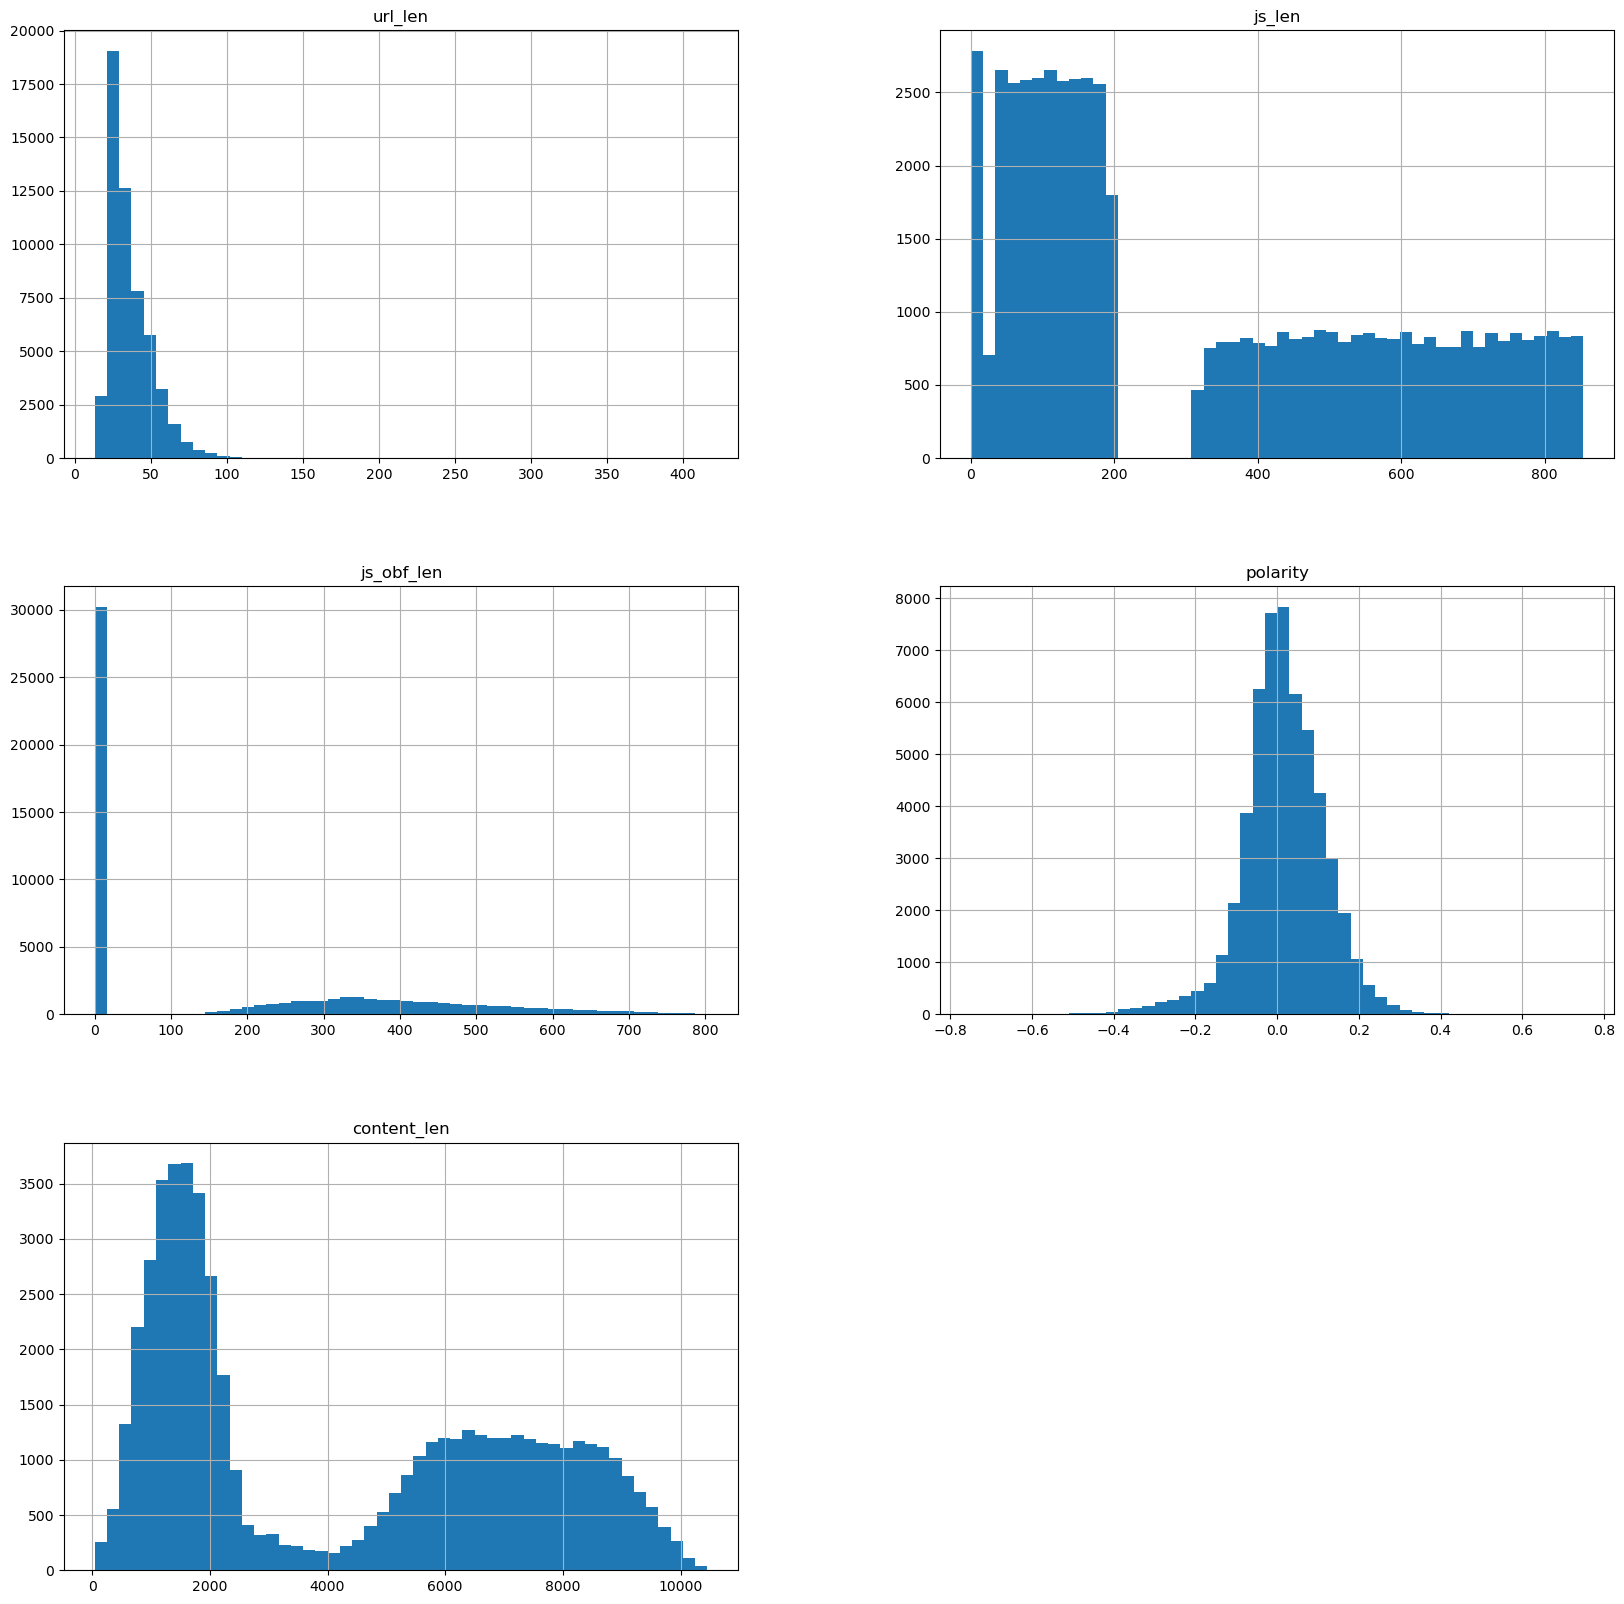

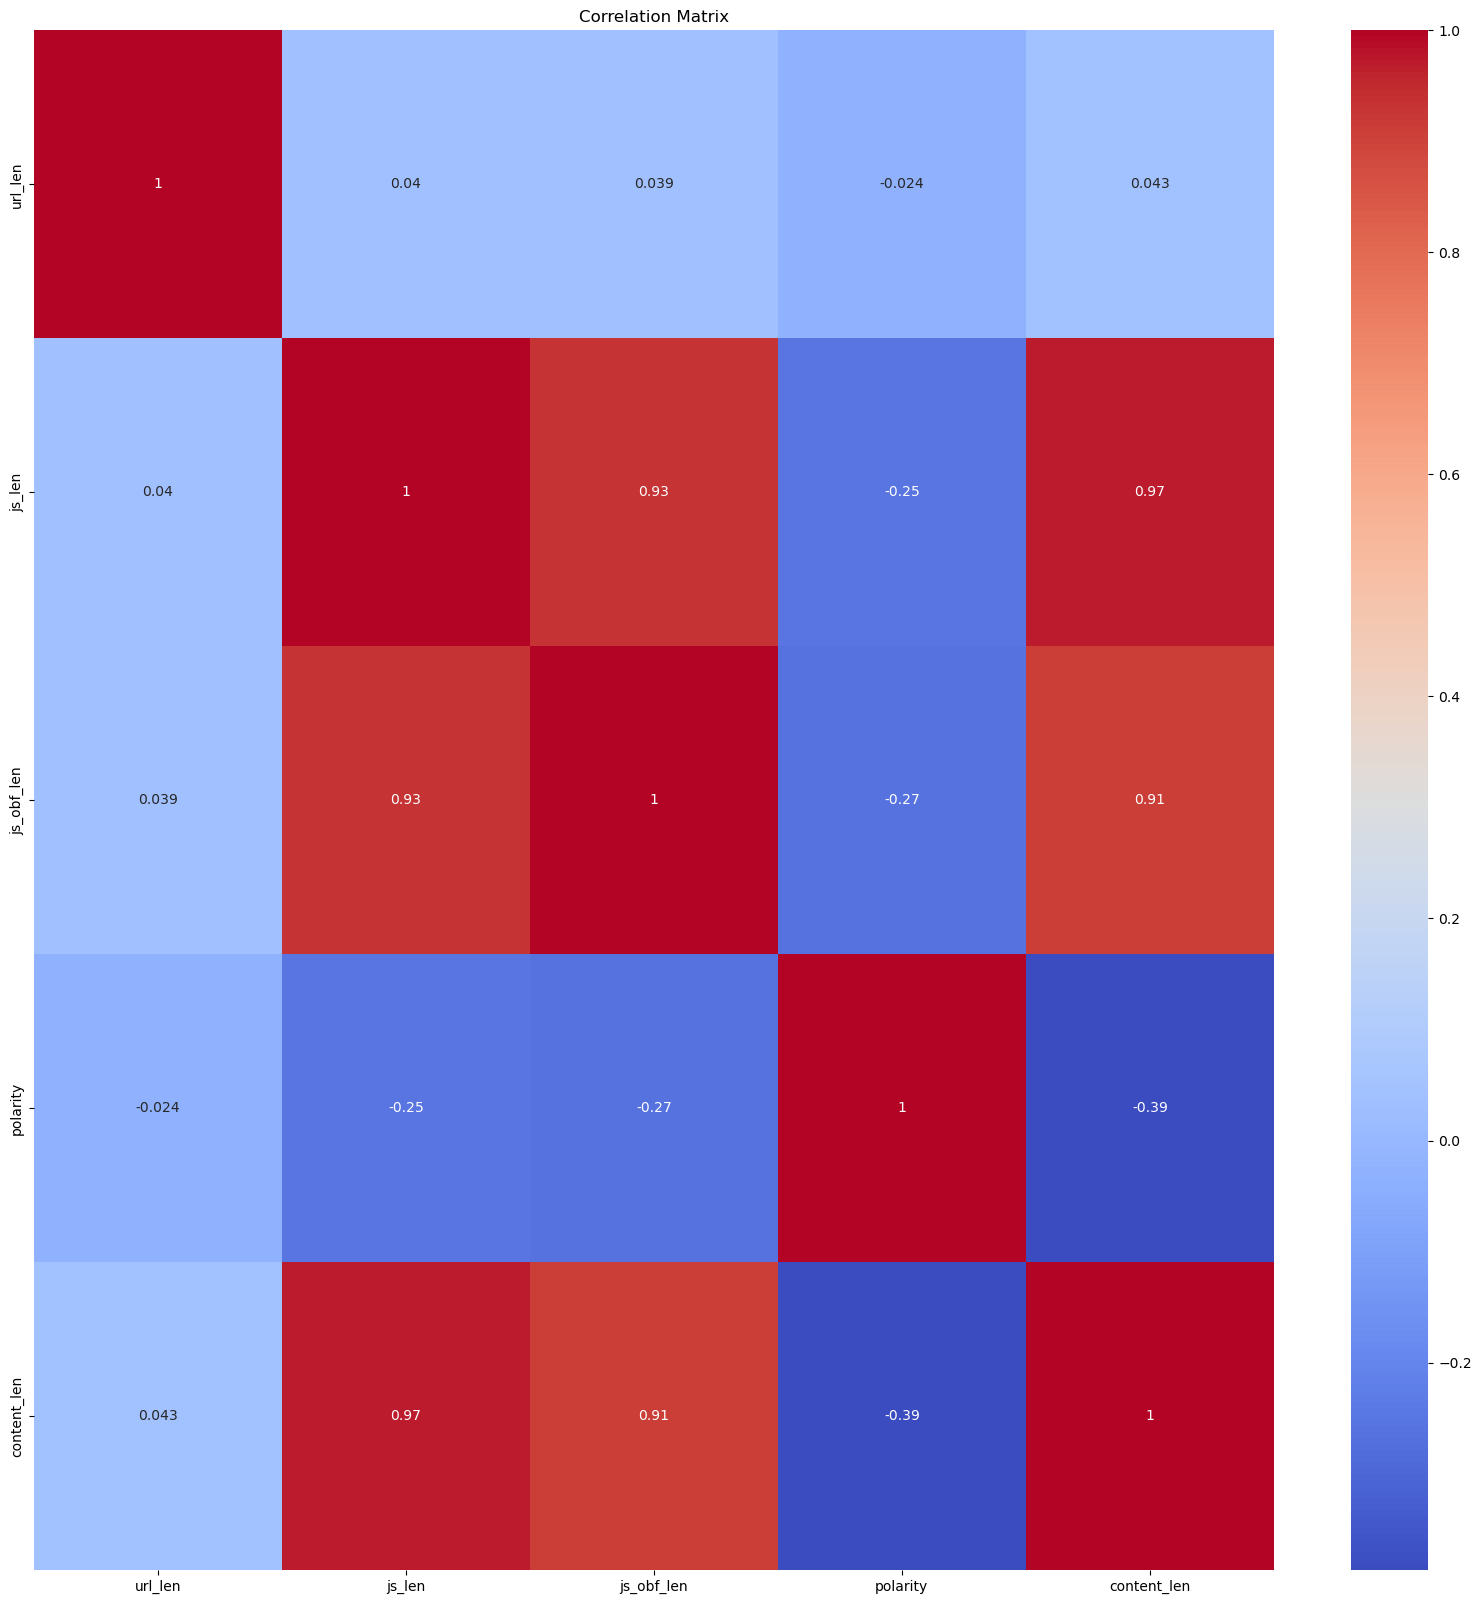

Most impactful features:
content_len    1.000000
js_len         0.969903
js_obf_len     0.912953
polarity       0.386906
url_len        0.043093
Name: content_len, dtype: float64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Analysis

# Histograms
data_n.hist(figsize=(20, 20), bins=50)
plt.show()

# Correlation matrix
numeric_df = data_n.select_dtypes(include=['number'])

correlation_matrix = data_n.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#print(correlation_matrix)


df_correlation = pd.DataFrame(correlation_matrix, index=correlation_matrix.keys())

# Get the absolute correlation coefficients for each feature
absolute_correlation = df_correlation.abs()

# Sort the absolute correlation coefficients in descending order
sorted_absolute_correlation = absolute_correlation.iloc[-1].sort_values(ascending=False)

# Display the most impactful features
print("Most impactful features:")
print(sorted_absolute_correlation)


### Histogram and Correlation of 100 vector features

In [1]:


# Correlation matrix
# numeric_dfv = vector.select_dtypes(include=['number'])

# correlation_matrixv = vector.corr()

# # Plotting the correlation matrix
# plt.figure(figsize=(20, 20))
# sns.heatmap(correlation_matrixv, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# print(correlation_matrixv)


# df_correlationv = pd.DataFrame(correlation_matrixv, index=correlation_matrixv.keys())

# # Get the absolute correlation coefficients for each feature
# absolute_correlationv = df_correlationv.abs()

# # Sort the absolute correlation coefficients in descending order
# sorted_absolute_correlationv = absolute_correlationv.iloc[-1].sort_values(ascending=False)

# # Display the most impactful features
# print("Most impactful features:")
# print(sorted_absolute_correlationv)


NameError: name 'vector' is not defined

## Logistic Regression using the attributes: 'url_len', 'js_len', 'js_obf_len' 'content_len' 'polarity' + 100 vector features


#### With the 100 extra features the logistic regression model's coefficients did not converge within the maximum number of iterations specified (max_iter). 

In [ ]:
from sklearn.linear_model import LogisticRegression

logitN = LogisticRegression(solver='saga', max_iter=10000)
logitN.fit(Xnorm,y)
print('Accuracy of log reg classifier')
print(logitN.score(Xnorm, y))


Accuracy of log reg classifier
0.9727919862033537


###  Visualize the learning curve for the Logistic Regression algorithm

Text(0.5, 0, 'Number of training examples')

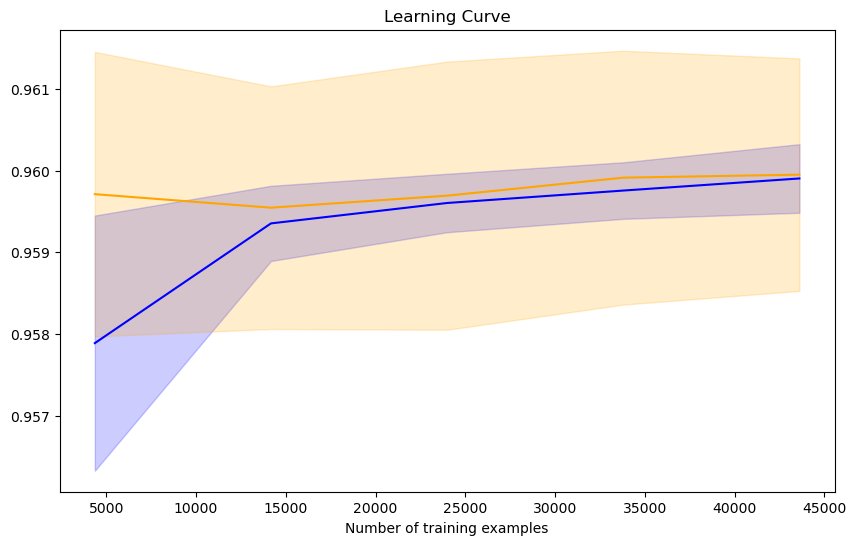

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(logitN, X, y, cv=5)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)
plt.title('Learning Curve')
plt.xlabel('Number of training examples')

## Test prediction

In [ ]:
X_test = df_test_reduced.iloc[:, [3,4,5,11,12]]
X_vector = df_test_reduced.iloc[:, 13]

concat_data_pred = []
for i in range(len(X_vector.values)):
    c_arr = np.concatenate((X_test.values[i], X_vector.values[i]))
    concat_data_pred.append(c_arr)

X_test_conc = np.array(concat_data_pred)
# X_test = X_test.values
 

Xnorm, X_mean, X_std = featureNormalization(X)
# X_test_norm, X_test_mean, X_test_std  = featureNormalization(X_test)
X_test_norm, X_test_mean, X_test_std  = featureNormalization(X_test_conc)


predictions = logitN.predict(X_test_norm)

predictions


array([0, 1, 1, ..., 1, 1, 1])

### Predictions Vs Real

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_test = df_test_reduced.iloc[:, 10]

y_test = y_test.replace({'good': 0, 'bad': 1})

y_test

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.9727919862033537
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27253
           1       0.97      0.98      0.97     27253

    accuracy                           0.97     54506
   macro avg       0.97      0.97      0.97     54506
weighted avg       0.97      0.97      0.97     54506



        benign  malign
benign   26428     825
malign     658   26595
54506


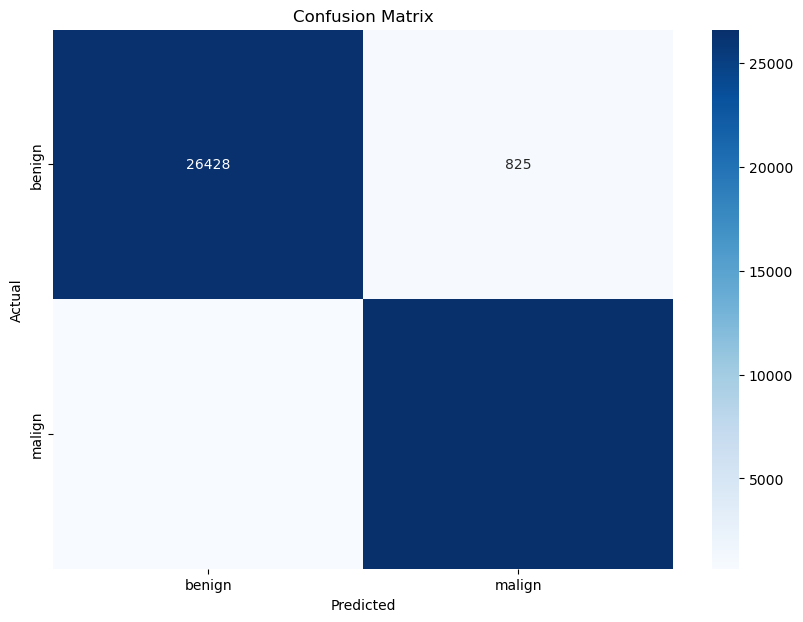

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Assuming 'predictions' is your model's predictions
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix to verify values
# print("Confusion Matrix:\n", cm)

df_cm = pd.DataFrame(cm, index=['benign', 'malign'], columns=['benign', 'malign'])
print(df_cm)
print(len(df_test_reduced))
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


plt.show()

## Neural Network Aproach

#### 105 features

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X_trainN = np.array(concat_data)
X_testN = np.array(concat_data_pred)
y_trainN = np.array(y)
y_testN = np.array(y_test)

# # Encoding labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_trainN)
y_test_encoded = label_encoder.transform(y_testN)
# Define the model
modelNN = Sequential()
modelNN.add(Dense(64, activation='relu', input_shape=(X_trainN.shape[1],)))
modelNN.add(Dense(32, activation='relu'))
modelNN.add(Dense(1, activation='sigmoid'))

# Compile the model
modelNN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
modelNN.fit(X_trainN, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = modelNN.evaluate(X_testN, y_test_encoded)
print(f'Test accuracy: {accuracy}')


2024-04-06 18:53:44.351239: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-06 18:53:45.943422: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-06 18:53:50.369698: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-06 18:54:00.169911: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/tomas/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 890us/step - accuracy: 0.8698 - loss: 4.9988 - val_accuracy: 0.9501 - val_loss: 0.3974
Epoch 2/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.9482 - loss: 0.2705 - val_accuracy: 0.9651 - val_loss: 0.0901
Epoch 3/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.9498 - loss: 0.2693 - val_accuracy: 0.9736 - val_loss: 0.1362
Epoch 4/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.9735 - loss: 0.1184 - val_accuracy: 0.9914 - val_loss: 0.0318
Epoch 5/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.9823 - loss: 0.0717 - val_accuracy: 0.9831 - val_loss: 0.0491
Epoch 6/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.9868 - loss: 0.0475 - val_accuracy: 0.9925 - val_loss: 0.0301
Epoch 7/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.9891 - loss: 0.0408 - val_accuracy: 0.9745 - val_loss: 0.0719
Epoch 8/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.9886 -

1704/1704 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step
Confusion Matrix:
 [[27178    75]
 [  143 27110]]
54506


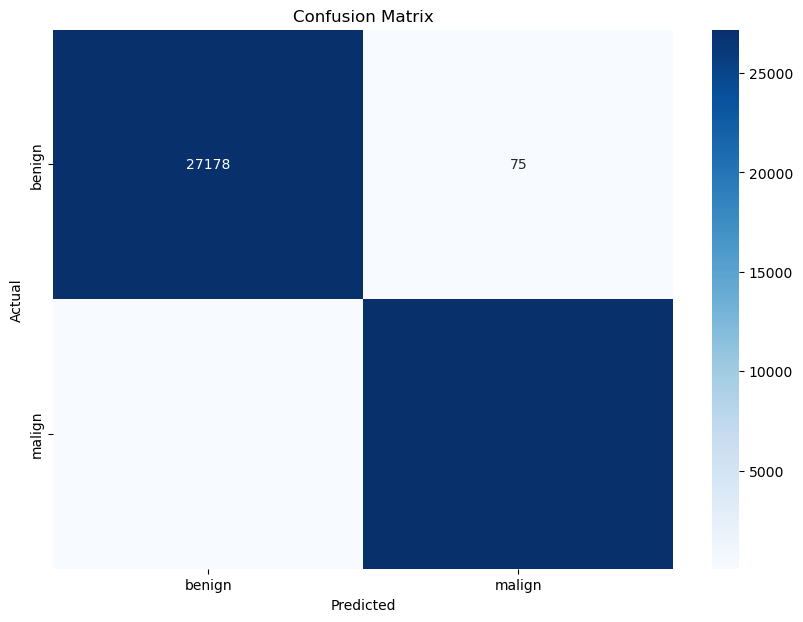

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'predictions' is your model's predictions
# Calculate the confusion matrix
y_pred_prob = modelNN.predict(X_testN)

# Convert probabilities to class predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate the confusion matrix
cmN = confusion_matrix(y_test_encoded, y_pred)
# Print the confusion matrix to verify values
print("Confusion Matrix:\n", cmN)
print(sum(sum(cmN)))
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cmN, annot=True, fmt='d', cmap='Blues', xticklabels=['benign', 'malign'], yticklabels=['benign', 'malign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


##### Learning curve with the 105 features

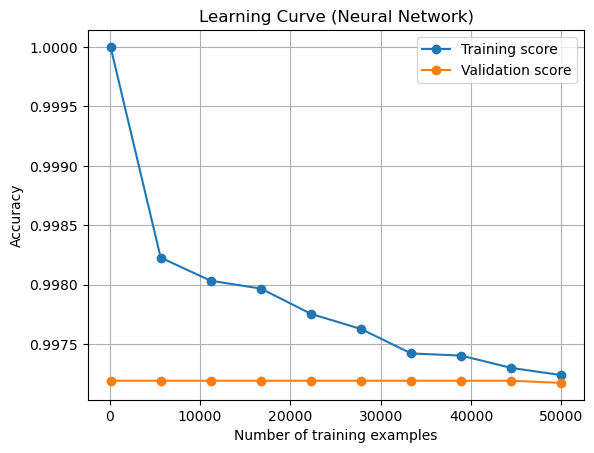

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of training sizes
train_sizesN = np.linspace(100, 50000, 10, dtype=int)

# Initialize lists to store scores
train_scoresN = []
test_scoresN = []

for size in train_sizesN:
    # Train the model on a subset of the training data
    history = modelNN.fit(X_trainN[:size], y_train_encoded[:size], epochs=10, batch_size=32, verbose=0, validation_data=(X_testN, y_test_encoded))
    train_scoresN.append(history.history['accuracy'][-1])
    test_scoresN.append(history.history['val_accuracy'][-1])

# Plot the learning curve
plt.plot(train_sizesN, train_scoresN, 'o-', label='Training score')
plt.plot(train_sizesN, test_scoresN, 'o-', label='Validation score')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Neural Network) 105 features')
plt.legend()
plt.grid()
plt.show()


#### 5 features (without content vector)

In [ ]:
X_train5N = np.array(data_n)
X_test5N = np.array(X_test)
y_train5N = np.array(y)
y_test5N = np.array(y_test)
print(X_train5N.shape)
# # Encoding labels
label_encoder = LabelEncoder()
y_train5_encoded = label_encoder.fit_transform(y_train5N)
y_test5_encoded = label_encoder.transform(y_test5N)
# Define the model
modelNN5 = Sequential()
modelNN5.add(Dense(64, activation='relu', input_shape=(X_train5N.shape[1],)))
modelNN5.add(Dense(32, activation='relu'))
modelNN5.add(Dense(1, activation='sigmoid'))

# Compile the model
modelNN5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
modelNN5.fit(X_train5N, y_train5_encoded, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss5, accuracy5 = modelNN5.evaluate(X_test5N, y_test5_encoded)
print(f'Test accuracy: {accuracy5}')

(54506, 5)
Epoch 1/10


/home/tomas/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1533/1533 ━━━━━━━━━━━━━━━━━━━━ 2s 719us/step - accuracy: 0.8679 - loss: 1.5075 - val_accuracy: 0.9384 - val_loss: 0.3602
Epoch 2/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.9361 - loss: 0.6258 - val_accuracy: 0.9637 - val_loss: 0.1981
Epoch 3/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.9390 - loss: 0.5441 - val_accuracy: 0.9540 - val_loss: 0.6319
Epoch 4/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - accuracy: 0.9457 - loss: 0.4103 - val_accuracy: 0.9547 - val_loss: 0.1935
Epoch 5/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.9429 - loss: 0.4359 - val_accuracy: 0.9629 - val_loss: 0.1448
Epoch 6/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.9513 - loss: 0.2942 - val_accuracy: 0.9681 - val_loss: 0.1064
Epoch 7/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.9519 - loss: 0.2594 - val_accuracy: 0.9835 - val_loss: 0.0422
Epoch 8/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.9633 - loss: 0.15

1704/1704 ━━━━━━━━━━━━━━━━━━━━ 1s 512us/step
Confusion Matrix:
 [[27175    78]
 [  371 26882]]
54506


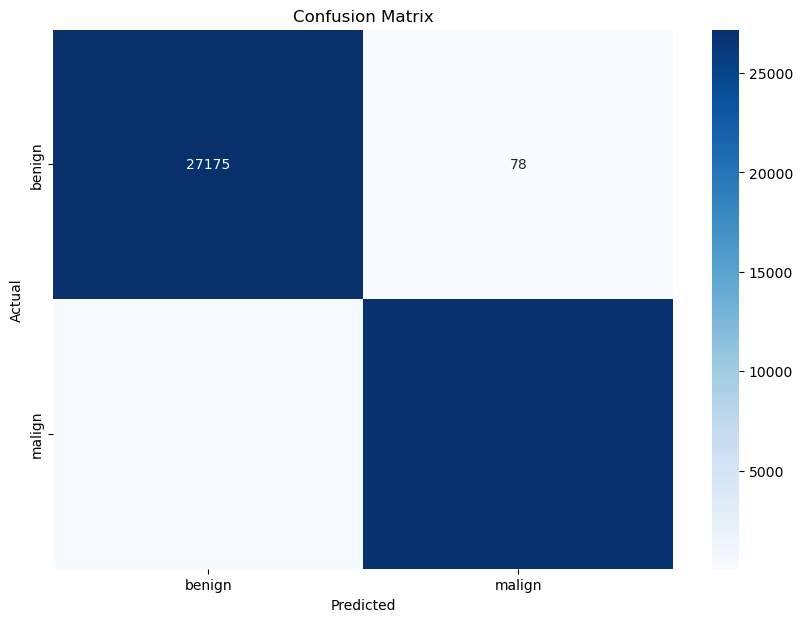

In [ ]:

y_pred_prob5 = modelNN5.predict(X_test5N)

# Convert probabilities to class predictions
y_pred5 = (y_pred_prob5 > 0.5).astype(int)

# Calculate the confusion matrix
cmN5 = confusion_matrix(y_test5_encoded, y_pred5)
# Print the confusion matrix to verify values
print("Confusion Matrix:\n", cmN5)
print(sum(sum(cmN5)))
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cmN5, annot=True, fmt='d', cmap='Blues', xticklabels=['benign', 'malign'], yticklabels=['benign', 'malign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


##### Learning curve with the 5 features

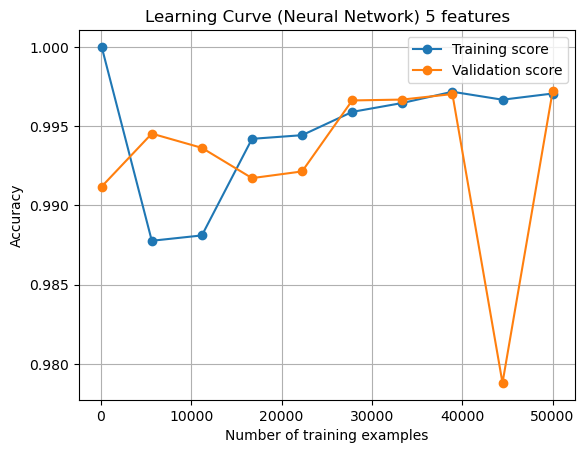

In [ ]:


# Define the range of training sizes
train_sizes5N = np.linspace(100, 50000, 10, dtype=int)

# Initialize lists to store scores
train_scores5N = []
test_scores5N = []

for size in train_sizes5N:
    # Train the model on a subset of the training data
    history = modelNN5.fit(X_train5N[:size], y_train5_encoded[:size], epochs=10, batch_size=32, verbose=0, validation_data=(X_test5N, y_test5_encoded))
    train_scores5N.append(history.history['accuracy'][-1])
    test_scores5N.append(history.history['val_accuracy'][-1])

# Plot the learning curve
plt.plot(train_sizes5N, train_scores5N, 'o-', label='Training score')
plt.plot(train_sizes5N, test_scores5N, 'o-', label='Validation score')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Neural Network) 5 features')
plt.legend()
plt.grid()
plt.show()


## Gradient Boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the classifier
gb_classifier.fit(np.array(concat_data), y_train_encoded)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(np.array(concat_data_pred))

# Calculate accuracy
accuracy_gb = accuracy_score(y_test_encoded, y_pred_gb)
print(f'Test accuracy: {accuracy_gb}')


Test accuracy: 0.9980736065754229


Confusion Matrix:
 [[27195    58]
 [   47 27206]]
54506


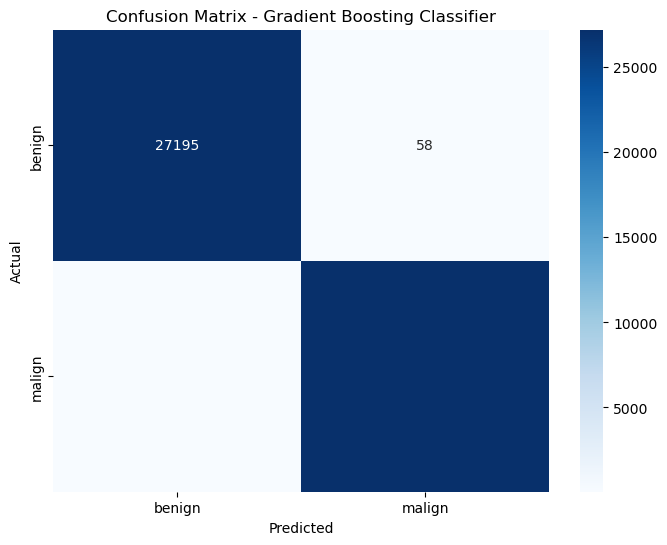

In [ ]:
cm_gb = confusion_matrix(y_test_encoded, y_pred_gb)
print("Confusion Matrix:\n", cm_gb)
print(sum(sum(cm_gb)))
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['benign', 'malign'], yticklabels=['benign', 'malign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()

##### Learning Curve Gradient Boosting Classifier

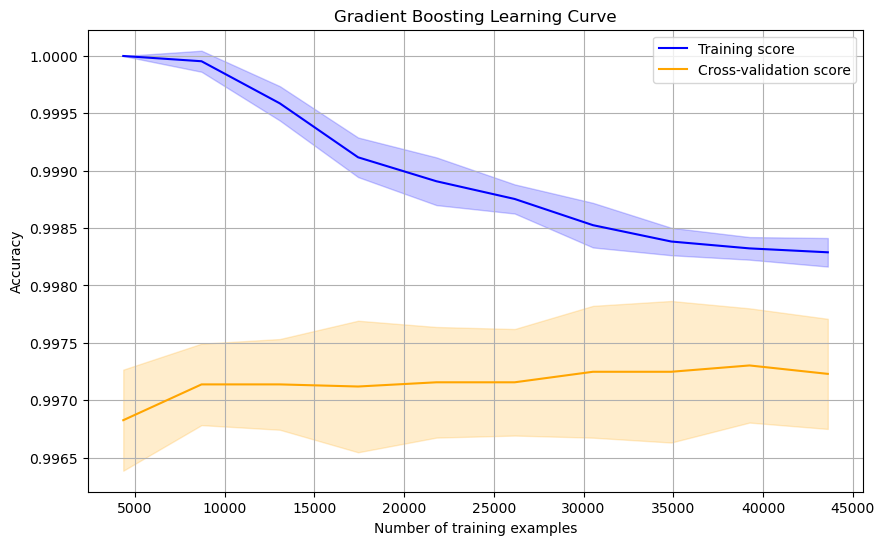

In [ ]:

# Generate learning curve data
train_sizesGB, train_scoresGB, test_scoresGB = learning_curve(
    gb_classifier, np.array(concat_data), y_train_encoded, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and test scores
train_meanGB = np.mean(train_scoresGB, axis=1)
train_stdGB = np.std(train_scoresGB, axis=1)
test_meanGB = np.mean(test_scoresGB, axis=1)
test_stdGB = np.std(test_scoresGB, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizesGB, train_meanGB, label='Training score', color='blue')
plt.fill_between(train_sizesGB, train_meanGB - train_stdGB, train_meanGB + train_stdGB, color='blue', alpha=0.2)
plt.plot(train_sizesGB, test_meanGB, label='Cross-validation score', color='orange')
plt.fill_between(train_sizesGB, test_meanGB - test_stdGB, test_meanGB + test_stdGB, color='orange', alpha=0.2)
plt.title('Gradient Boosting Learning Curve')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(np.array(concat_data), y_train_encoded)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(np.array(concat_data_pred))

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
print(f'Test accuracy: {accuracy_rf}')


Test accuracy: 1.0


Confusion Matrix:
 [[27253     0]
 [    0 27253]]
54506


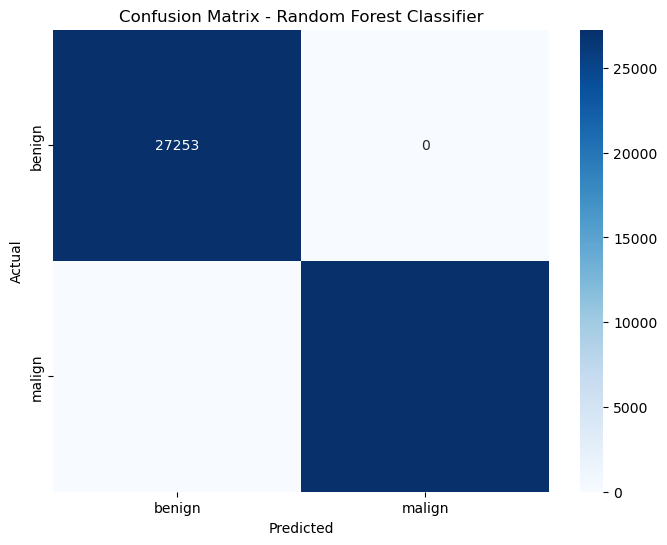

In [ ]:
# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test_encoded, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)
print(sum(sum(cm_rf)))
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['benign', 'malign'], yticklabels=['benign', 'malign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

##### Learning Curve Random Forest Classifier

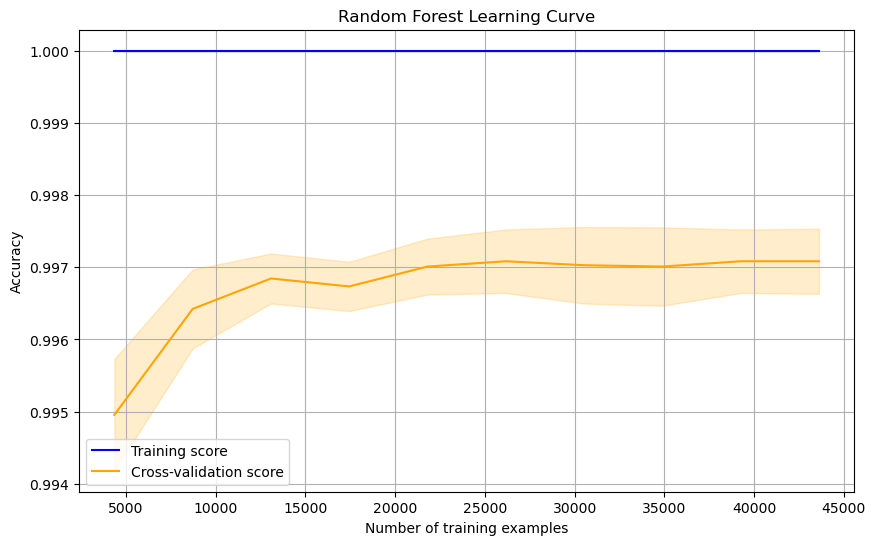

In [ ]:
train_sizesRF, train_scoresRF, test_scoresRF = learning_curve(
    rf_classifier, np.array(concat_data), y_train_encoded, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and test scores
train_meanRF = np.mean(train_scoresRF, axis=1)
train_stdRF = np.std(train_scoresRF, axis=1)
test_meanRF = np.mean(test_scoresRF, axis=1)
test_stdRF = np.std(test_scoresRF, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizesRF, train_meanRF, label='Training score', color='blue')
plt.fill_between(train_sizesRF, train_meanRF - train_stdRF, train_meanRF + train_stdRF, color='blue', alpha=0.2)
plt.plot(train_sizesRF, test_meanRF, label='Cross-validation score', color='orange')
plt.fill_between(train_sizesRF, test_meanRF - test_stdRF, test_meanRF + test_stdRF, color='orange', alpha=0.2)
plt.title('Random Forest Learning Curve')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

##  K-Nearest Neighbors classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier with k=5 (you can adjust the value of k as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(np.array(concat_data), y_train_encoded)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(np.array(concat_data_pred))

# Calculate accuracy
accuracy_knn = accuracy_score(y_test_encoded, y_pred_knn)
print(f'Test accuracy: {accuracy_knn}')


Test accuracy: 0.9971746229772869


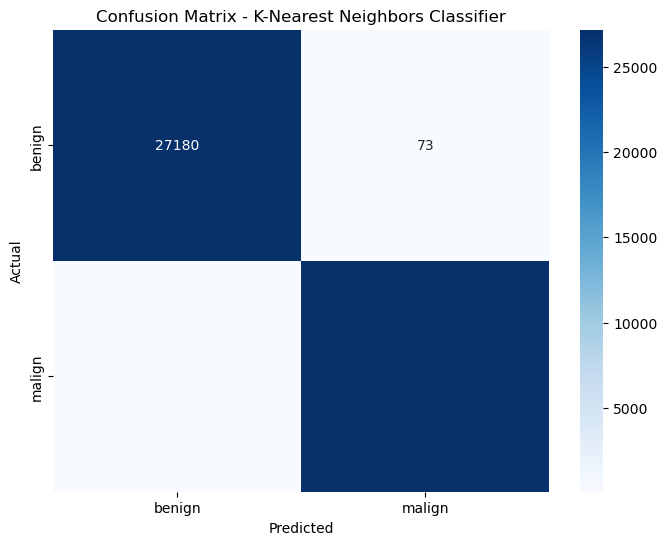

In [ ]:
# Calculate the confusion matrix
cm_knn = confusion_matrix(y_test_encoded, y_pred_knn)
print("Confusion Matrix:\n", cm_knn)
print(sum(sum(cm_knn)))
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['benign', 'malign'], yticklabels=['benign', 'malign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors Classifier')
plt.show()

##### Learning Curve K Neighbors Classifier

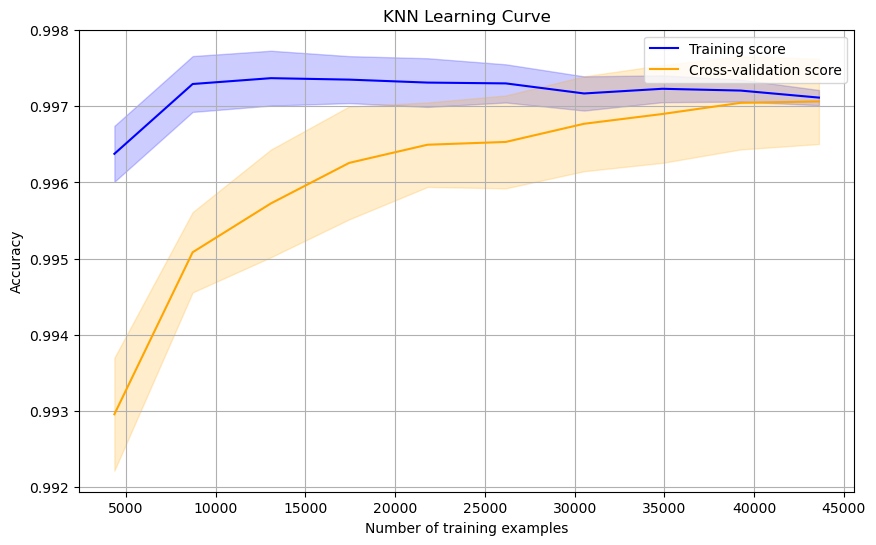

In [ ]:

# Generate learning curve data
train_sizesKNN, train_scoresKNN, test_scoresKNN = learning_curve(
    knn_classifier, np.array(concat_data), y_train_encoded, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and test scores
train_meanKNN = np.mean(train_scoresKNN, axis=1)
train_stdKNN = np.std(train_scoresKNN, axis=1)
test_meanKNN = np.mean(test_scoresKNN, axis=1)
test_stdKNN = np.std(test_scoresKNN, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizesKNN, train_meanKNN, label='Training score', color='blue')
plt.fill_between(train_sizesKNN, train_meanKNN - train_stdKNN, train_meanKNN + train_stdKNN, color='blue', alpha=0.2)
plt.plot(train_sizesKNN, test_meanKNN, label='Cross-validation score', color='orange')
plt.fill_between(train_sizesKNN, test_meanKNN - test_stdKNN, test_meanKNN + test_stdKNN, color='orange', alpha=0.2)
plt.title('KNN Learning Curve')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()